In [2]:
format compact

# Results from August Simulations
#### Ben Alford - Dartmouth College - September 2020

## Simulation Methods

Sequences Used: WHH-4, MREV-8, Cory-48, Cory-24

Cory 24 is a 24-pulse sequence created as a "more efficient version" of BR-24 (Cory, 1991, JMR)

$$$$

Parameter Space:

Pulse length: up to 1.4 microseconds

Tau Spacing: up to 6.5 microseconds

Chemical Shift/Offset: up to 10 kHz (accounts for any terms proportional to $I_z$)

Coupling Strength: up to 50 kHz

30 values of each parameter used

10 random coupling-strength matrices 

For each set of 4 parameters, the fidelity after 10 milliseconds was calculated using $f = \text{Tr}\big ( U_{\text{exp}}U_{\text{theory}}^\dagger \big ) $ for each coupling matrix; the average was then recorded

The average hamiltonians used were: 


$$\bar H_{\text{WHH}} = \frac{\Delta}{3}(X+Y+Z)$$


$$\bar H_{\text{MREV8}} = \frac{\Delta}{2}(X+Z)$$


$$\bar H_{\text{CORY48}} = \bar H_{\text{CORY24}}= 0$$

The number of cycles $N_{\text{cyc}}$ to be run was determined by dividing the cutoff time by the cycle time and rounding up: 
$$ N_{\text{cyc}}=\text{ceil}\bigg(\frac{\text{cutoffTime}}{\text{cycleTime}}\bigg) $$
These sharp cutoffs did sometimes affect the results; in several of the plots below, the fidelity appears to suddenly jump. These jumps most likely occur where the sequence becomes sufficiently long that $N_{\text{cyc}}$ decreases. These jumps were mostly only noticable when the coupling strength was very low and the fidelity was very good.

## CORY-48 Results

To configure plots:

In [3]:
%r=load('/Users/alfordb/Documents/MATLAB/code/test_results_CORY_fixedTime.mat');

meshing=30;
maxTau = 6.5;
maxPulse = 1.4;
maxDelta = 10000;
maxCoupling = 50000;

taus=zeros(meshing,1);
pulses=zeros(meshing,1);
deltas = zeros(meshing,1);
couplings=zeros(meshing,1);

for i=1:meshing
    taus(i)=(maxTau/meshing)*i*10^(-6);
    pulses(i)=(maxPulse/meshing)*i;
    deltas(i)=(-1) * maxDelta + 2*(maxDelta/meshing)*i;
    couplings(i)=(maxCoupling/meshing)*i;
end

isoContours = [0.9 0.99 0.999];
V = zeros(meshing, meshing, meshing);
colors = {'blue', 'red', 'green'};

Cory-48 performed quite well for the 10ms simulation. This sequence performed best with zero offset and performed worse as offset increased.This sequence could tolerate coupling strengths of up to 20 kHz for sufficiently short pulses.  At a coupling strength of 5 kHz and zero offset, Cory-48 can obtain 0.9 fidelity with pulses as long as 0.5 microseconds and even 0.99 fidelity with 0.2 microsecond pulses and delays of 0 to 2 microseconds.

Cory-48 fidelity level surfaces for $\Delta=0$

In [49]:
%plot native
chosenDeltaIndex = 15;  % run this line to plot Cory-48 with zero offset
fixed_offset_plot

For nonzero offset, Cory-48 still performs well, but requires lower tau-spacing and pulse length than at zero offset to achieve the same fidelity at the same coupling strength.

In [50]:
%plot native
chosenDeltaIndex = 16;  % run this line to plot Cory-48 with nonzero offset
fixed_offset_plot

When the offset is increased further, the plot's shape remains the same but the fidelity worsens. 

In [51]:
%plot native
chosenDeltaIndex = 27;
fixed_offset_plot

The dependence on the offset is symmetric and does not depend on the sign of the offset term.

In [52]:
%plot native
chosenCouplingIndex = 6;
fixed_coupling_plot

The additional higher-fidelity region for longer tau-spacing is most likely because cycles with a longer cycle time were run for fewer cycles, requiring a cutoff-time to change the number of cycles. This region is probably right at the edge of the cutoff, causing the fidelity to briefly increase due to fewer cycles being run.

When the pulse length is fixed, similar patterns can be observed. The waves along the tail of the plot are most likely the result of the hard cutoff time. Once again the system has the highest fidelity when all parameters are closest to zero.

In [53]:
%plot native
chosenPulseIndex = 10;
fixed_pulse_plot

## MREV-8 Results

The version of MREV-8 used for these simulations was:$$$$ $$\tau,\bar X, \tau,\bar Y, 2\tau, Y, \tau, X, 2\tau,X,\tau, \bar Y, 2\tau, Y,\tau, \bar X, \tau$$

In [54]:
r=load('/Users/alfordb/Documents/MATLAB/code/test_results_MREV8_fixedTime_v2.mat');

MREV-8 performed extremely poorly over this long of a timescale, never attaining a fidelity greater than 0.99 even for very low values of all parameters.  MREV-8 also performs best with a nonzero chemical shift of about 40 Hz.  At this optimal offset, MREV-8 can achieve a fidelity above 0.9 for pulses up to 0.1 microseconds in length for sufficiently low coupling strength.  The optimal tau-spacing for MREV-8 is greater than zero and tau-spacings lower than 1.5 microseconds are not permitted.

MREV-8 did not hold up over this long of a timescale and never attained a fidelity of 0.99 or greater.  MREV-8 could not attain a fidelity above 0.9 for coupling strengths greater than 2 kHz.

In [55]:
%plot native
chosenDeltaIndex = 15;
fixed_offset_plot

In [56]:
%plot native
chosenDeltaIndex = 17;
fixed_offset_plot

In [57]:
%plot native
chosenCouplingIndex = 1;
fixed_coupling_plot

## WAHUHA-4 Results

The version of WHH-4 used for these simulations was: $$\tau,X,\tau,\bar Y,2\tau,Y,\tau,\bar X,\tau$$

In [7]:
r=load('Spinsim-2020/test_results_WHH_fixedTime_midDelta-THISONE.mat');
% WHH simulations were run over a smaller version of the parameter space
maxTau = 14;
maxPulse = 1.4;
maxDelta = 2000;
maxCoupling = 4000;
for i=1:meshing
    taus(i)=(maxTau/meshing)*i*10^(-6);
    pulses(i)=(maxPulse/meshing)*i*10^(-6);
    deltas(i)=(-1) * maxDelta + 2*(maxDelta/meshing)*i;
    couplings(i)=(maxCoupling/meshing)*i;
end

Unlike CORY-48, WAHUHA performs better with a nonzero tau-spacing and offset. WAHUHA performs better than MREV-8 and their plots take similar shapes.

In [6]:
%plot native
chosenDeltaIndex = 15;
fixed_offset_plot

In [8]:
%plot native
chosenDeltaIndex = 17;
fixed_offset_plot

In [9]:
%plot native
chosenCouplingIndex = 12;
fixed_coupling_plot

In [8]:
%plot native
chosenPulseIndex = 12;
fixed_pulse_plot

### CORY-24

In a 1991 *Journal of Magnetic Resonance* paper, Cory proposes a 24-pulse sequence as a "more efficient" version of BR-24.  This sequence produced results similar to the longer 48-pulse sequence, though the acceptable coupling strengths are lower for this sequence.  The sequence is shown below (figure from Cory, JMR, 1991)

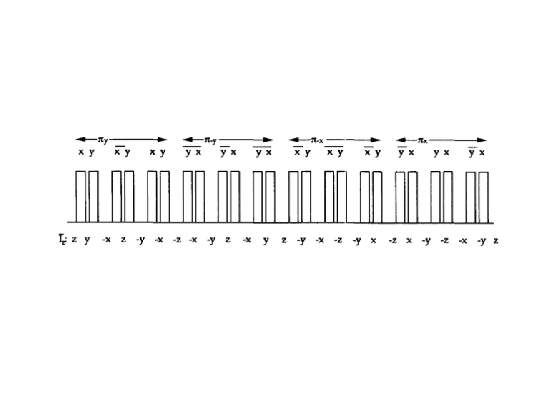

In [26]:
%plot inline
img=imread('/Users/alfordb/Jupyter/CORY_fig.png');
imshow(img)

In [42]:
r=load('/Users/alfordb/Documents/MATLAB/code/test_results_CORY24_fixedTime.mat');

meshing=30;
maxTau = 6.5;
maxPulse = 1.4;
maxDelta = 10000;
maxCoupling = 50000;

for i=1:meshing
    taus(i)=(maxTau/meshing)*i*10^(-6);
    pulses(i)=(maxPulse/meshing)*i;
    deltas(i)=(-1) * maxDelta + 2*(maxDelta/meshing)*i;
    couplings(i)=(maxCoupling/meshing)*i;
end

For an offset of zero, CORY-48 and CORY-24 produce very similar results.  Results with $\Delta \neq 0$ are not accurate as the wrong average Hamiltonian was used.

In [43]:
%plot native
chosenDeltaIndex = 15;
fixed_offset_plot

In [44]:
%plot native
chosenDeltaIndex = 16;
fixed_offset_plot